In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesScalerMinMax

In [27]:
df = pd.read_csv('data.csv')
df

,date-time,temp,1,2
0,2022/10/18 00:00:00,18.7,8,1
1,2022/10/18 1:00:00,18.7,8,1
2,2022/10/18 2:00:00,18.2,8,1
3,2022/10/18 3:00:00,17.0,8,1
4,2022/10/18 4:00:00,16.5,8,1
...,...,...,...,...
8755,2023/10/17 19:00:00,20.5,8,1
8756,2023/10/17 20:00:00,19.0,8,1
8757,2023/10/17 21:00:00,18.1,8,1
8758,2023/10/17 22:00:00,16.6,8,1


In [28]:
df.columns

Index(['date-time', 'temp', '1', '2'], dtype='object')

<Axes: >

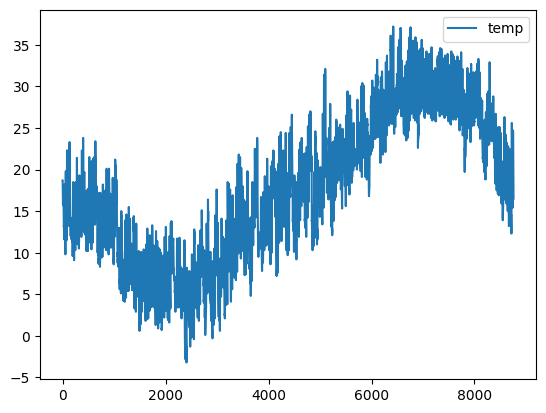

In [29]:
df.plot(y='temp')

In [33]:
df['date'] = pd.to_datetime(df['date-time']).dt.date
df['time'] = pd.to_datetime(df['date-time']).dt.time
df['month'] = pd.to_datetime(df['date-time']).dt.month
df

,date-time,temp,1,2,date,time,month
0,2022/10/18 00:00:00,18.7,8,1,2022-10-18,00:00:00,10
1,2022/10/18 1:00:00,18.7,8,1,2022-10-18,01:00:00,10
2,2022/10/18 2:00:00,18.2,8,1,2022-10-18,02:00:00,10
3,2022/10/18 3:00:00,17.0,8,1,2022-10-18,03:00:00,10
4,2022/10/18 4:00:00,16.5,8,1,2022-10-18,04:00:00,10
...,...,...,...,...,...,...,...
8755,2023/10/17 19:00:00,20.5,8,1,2023-10-17,19:00:00,10
8756,2023/10/17 20:00:00,19.0,8,1,2023-10-17,20:00:00,10
8757,2023/10/17 21:00:00,18.1,8,1,2023-10-17,21:00:00,10
8758,2023/10/17 22:00:00,16.6,8,1,2023-10-17,22:00:00,10


In [50]:
data_li=[]
date_li=[]
for d in df['date'].unique():
    data_li.append(df.loc[df['date']==d, 'temp'].reset_index(drop=True))

In [56]:
df_temp = pd.concat(data_li, axis=1)
df_temp.columns = df['date'].unique()
df_temp = df_temp.T
df_temp.columns = df['time'].unique()
df_temp

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2022-10-18,18.7,18.7,18.2,17.0,16.5,16.7,15.8,16.1,16.1,15.9,...,18.1,17.8,17.2,17.0,17.0,15.9,15.1,14.3,13.6,13.1
2022-10-19,13.2,13.1,12.8,12.6,12.2,11.8,11.6,12.0,13.9,14.3,...,18.2,17.4,16.8,16.4,16.0,14.6,14.1,14.2,14.3,14.3
2022-10-20,13.0,12.2,12.8,11.1,10.8,10.3,9.8,11.1,13.8,16.0,...,19.6,18.8,17.3,15.7,14.1,14.7,14.3,14.9,13.7,13.5
2022-10-21,12.8,13.1,12.3,11.9,12.4,11.5,11.7,12.1,14.5,16.3,...,21.9,21.7,20.5,19.4,18.9,18.4,18.3,18.0,16.2,15.9
2022-10-22,14.9,15.4,15.5,15.3,15.0,15.4,14.7,14.9,15.6,17.2,...,20.0,19.7,18.5,17.5,16.4,16.5,15.7,15.5,14.6,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-13,18.6,17.9,17.2,16.7,16.1,15.6,15.0,16.0,17.6,18.9,...,22.7,22.3,22.0,20.2,19.6,17.8,17.4,16.9,15.9,16.0
2023-10-14,15.8,14.7,14.7,14.5,14.1,13.2,13.5,14.1,16.4,16.9,...,22.1,21.4,21.4,20.9,20.4,20.3,20.4,19.6,20.0,18.4
2023-10-15,16.9,15.7,15.1,15.0,15.0,14.6,14.6,14.4,14.3,14.2,...,15.3,15.8,16.3,15.7,15.1,15.2,14.8,14.8,14.4,14.6
2023-10-16,14.5,14.4,13.9,13.5,12.9,12.6,12.3,13.6,16.4,19.4,...,25.3,23.2,22.3,21.7,20.9,20.9,19.8,19.5,18.6,18.7


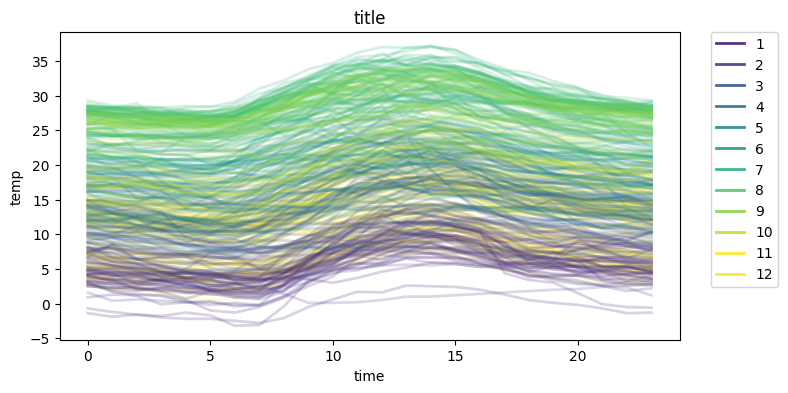

In [74]:
# カラーマップを設定します（例: 'viridis' カラーマップを使用）
cmap = plt.get_cmap('viridis')
# plt.figure(figsize=(8, 4))  # プロットのサイズを設定します
fig, ax = plt.subplots(1,1, figsize=(8,4))

month_num = 12


for ind in df_temp.index:
    month=pd.to_datetime(ind).month
    data = df_temp.loc[ind,:]

    color = cmap(month / (month_num - 1))  # カラーマップから色を取得します
    # プロットを作成します
    ax.plot(range(0,24), data.values, color=color, alpha=0.2, linewidth=2)  # データをプロットします

for m in range(12):
    month=m+1
    color = cmap(month / (month_num - 1))  # カラーマップから色を取得します
    # プロットを作成します
    ax.plot([], color=color, alpha=0.9, linewidth=2, label=month)  # データをプロットします
    
ax.set_xlabel('time')  # x軸のラベルを設定します
ax.set_ylabel('temp')  # y軸のラベルを設定します
ax.set_title('title')  # グラフのタイトルを設定します
# ax.grid(True)  # グリッドを表示します
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)  # 凡例を表示します

# プロットを表示します
plt.show()




標準化

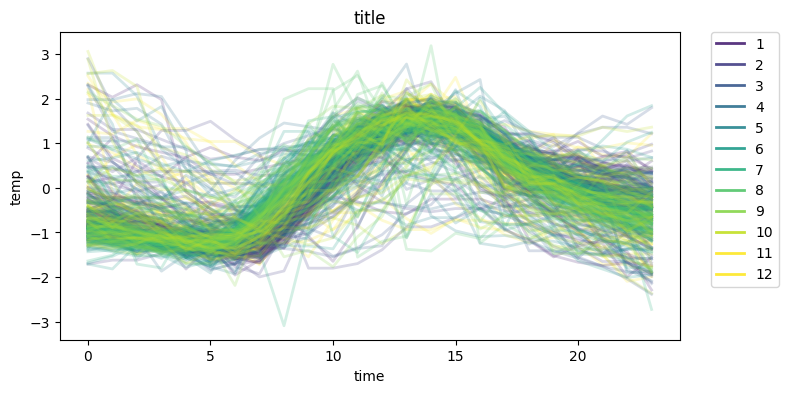

In [85]:
# カラーマップを設定します（例: 'viridis' カラーマップを使用）
cmap = plt.get_cmap('viridis')
# plt.figure(figsize=(8, 4))  # プロットのサイズを設定します
fig, ax = plt.subplots(1,1, figsize=(8,4))

month_num = 12

scaler = TimeSeriesScalerMeanVariance(mu=0.,std=1.)


for ind in df_temp.index:
    month=pd.to_datetime(ind).month
    data = scaler.fit_transform([df_temp.loc[ind,:]])
    
    color = cmap(month / (month_num - 1))  # カラーマップから色を取得します
    # プロットを作成します
    ax.plot(range(0,24), data[0], color=color, alpha=0.2, linewidth=2)  # データをプロットします

for m in range(12):
    month=m+1
    color = cmap(month / (month_num - 1))  # カラーマップから色を取得します
    # プロットを作成します
    ax.plot([], color=color, alpha=0.9, linewidth=2, label=month)  # データをプロットします
    
ax.set_xlabel('time')  # x軸のラベルを設定します
ax.set_ylabel('temp')  # y軸のラベルを設定します
ax.set_title('title')  # グラフのタイトルを設定します
# ax.grid(True)  # グリッドを表示します
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)  # 凡例を表示します

# プロットを表示します
plt.show()

(0,1)に正規化

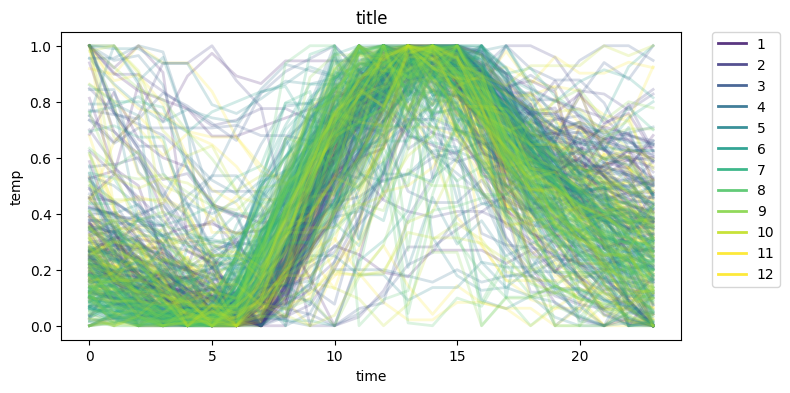

In [86]:
# カラーマップを設定します（例: 'viridis' カラーマップを使用）
cmap = plt.get_cmap('viridis')
# plt.figure(figsize=(8, 4))  # プロットのサイズを設定します
fig, ax = plt.subplots(1,1, figsize=(8,4))

month_num = 12

scaler = TimeSeriesScalerMinMax(value_range=(0.0, 1.0))

for ind in df_temp.index:
    month=pd.to_datetime(ind).month
    data = scaler.fit_transform([df_temp.loc[ind,:]])
    
    color = cmap(month / (month_num - 1))  # カラーマップから色を取得します
    # プロットを作成します
    ax.plot(range(0,24), data[0], color=color, alpha=0.2, linewidth=2)  # データをプロットします

for m in range(12):
    month=m+1
    color = cmap(month / (month_num - 1))  # カラーマップから色を取得します
    # プロットを作成します
    ax.plot([], color=color, alpha=0.9, linewidth=2, label=month)  # データをプロットします
    
ax.set_xlabel('time')  # x軸のラベルを設定します
ax.set_ylabel('temp')  # y軸のラベルを設定します
ax.set_title('title')  # グラフのタイトルを設定します
# ax.grid(True)  # グリッドを表示します
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)  # 凡例を表示します

# プロットを表示します
plt.show()

標準化の方がそろっている印象